# Business Understanding

## We analyze the Seattle and Boston dataset to answer the following questions

* How the airbnb inventory of Seattle changes with the time?
* How the airbnb price of Seattle changes with the time?
* How the airbnb inventory of Boston changes with the time?
* How the airbnb price of Boston changes with the time?
* What is the difference of airbnb market between Seattle and Boston?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
%load_ext pycodestyle_magic

# Data Understanding

## Add helper functions

In [2]:
def change_money(value):
    """
    Takes money value as string and converts it to float value format.
    """
    if type(value) == str:
        return float(value.replace("$", "").replace(",", ""))
    else:
        return float(value)

## Load listings, calander, and reviews of Seattle Airbnb

In [3]:
seattle_listings = pd.read_csv('./seattle_dataset/listings.csv')
print(seattle_listings.shape)
seattle_listings.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
seattle_calendar = pd.read_csv("./seattle_dataset/calendar.csv")
print(seattle_calendar.shape)
seattle_calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
seattle_reviews = pd.read_csv("./seattle_dataset/reviews.csv")
print(seattle_reviews.shape)
seattle_reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
# See all the columns
print(seattle_listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Load data of Boston Airbnb

In [7]:
boston_calendar = pd.read_csv("./boston_dataset/calendar.csv")
print(boston_calendar.shape)
boston_calendar.head()

(1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


## The time range of datasets

In [8]:
print(min(seattle_calendar['date']), max(seattle_calendar['date']))

2016-01-04 2017-01-02


In [9]:
print(min(boston_calendar['date']), max(boston_calendar['date']))

2016-09-06 2017-09-05


#### From the above observations, we can see that both the Seattle dataset and the Boston dataset contain the listings for exactly one year

# Prepare the Data

In [10]:
# null counts
print('Seattle Date:     ', seattle_calendar['date'].isnull().sum())
print('Seattle Available:', seattle_calendar['available'].isnull().sum())
print('Seattle Price:    ', seattle_calendar['price'].isnull().sum())
print('Boston Date:      ', boston_calendar['date'].isnull().sum())
print('Boston Available: ', boston_calendar['date'].isnull().sum())
print('Boston Price:     ', boston_calendar['price'].isnull().sum())

Seattle Date: 0
Seattle Available: 0
Seattle Price: 459028
Boston Date: 0
Boston Available: 0
Boston Price: 665853


## Change the data types and formats

In [11]:
# change the data type of date
seattle_calendar['date'] = pd.DatetimeIndex(seattle_calendar['date'])
boston_calendar['date'] = pd.DatetimeIndex(boston_calendar['date'])
# change the money to float type
seattle_calendar['price'] = seattle_calendar['price'].apply(change_money)
boston_calendar['price'] = boston_calendar['price'].apply(change_money)

## Check the missing Values

In [12]:
sum(seattle_calendar[seattle_calendar['available'] == 'f']['price'].notnull())

0

In [13]:
sum(seattle_calendar[seattle_calendar['available'] == 't']['price'].isnull())

0

In [14]:
sum(boston_calendar[boston_calendar['available'] == 'f']['price'].notnull())

0

In [15]:
sum(boston_calendar[boston_calendar['available'] == 't']['price'].isnull())

0

#### From the above results, we can see that only available listings have prices

## Get the available listings

In [16]:
seattle_calendar_a = seattle_calendar[seattle_calendar['available'] == 't']
seattle_calendar_a.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [17]:
boston_calendar_a = boston_calendar[boston_calendar['available'] == 't']
boston_calendar_a.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


# Evaluate the Restuls

## Q1: How the airbnb inventory of Seattle changes with the time?

### Monthly Inventory of Seattle Airbnb

Text(0.5, 0, 'month')

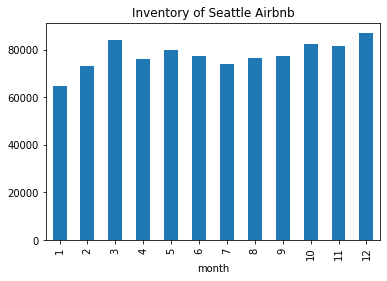

In [18]:
seattle_inventory = seattle_calendar_a['listing_id'].groupby(
                        seattle_calendar_a['date'].dt.month).count()
seattle_inventory.plot(kind='bar')
plt.title('Inventory of Seattle Airbnb')
plt.xlabel('month')

#### From the above result, we can see that Seattle experiences a notable seasonal variation in its Airbnb inventory. The highest inventory occurs in December. Conversely, January witnesses the lowest inventory.

## Q2: How the airbnb price of Seattle changes with the time?

### Monthly-averaged Price of Seattle Airbnb

Text(0, 0.5, 'price ($)')

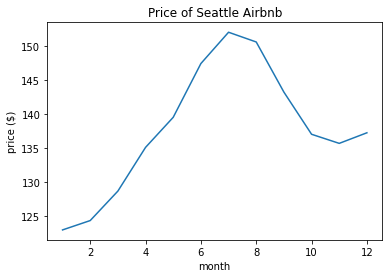

In [19]:
seattle_price = seattle_calendar_a['price'].groupby(
    seattle_calendar_a['date'].dt.month).mean()
seattle_price.plot()
plt.title('Price of Seattle Airbnb')
plt.xlabel('month')
plt.ylabel('price ($)')

### Daily-averaged price of Seattle Airbnb

In [20]:
seattle_calendar_a.set_index('date', inplace=True)
seattle_calendar_a_d = seattle_calendar_a['price'].resample('D')

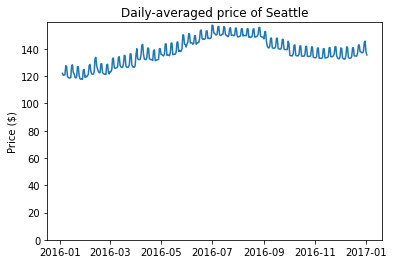

In [21]:
plt.plot(seattle_calendar_a_d.mean())
plt.title('Daily-averaged price of Seattle')
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.ylabel('Price ($)')
plt.show()

#### From the above two images, the average listing price in Seattle demonstrates intriguing fluctuations throughout the year. July claims the highest average price. On the other hand, January features the lowest average price, possibly due to decreased demand during the winter months. Also, weekly periodic pattern is observed. Probablly due to higher demand in weekend.

## Q3: How the airbnb inventory of Boston changes with the time?

### Monthly Inventory of Boston Airbnb

Text(0.5, 0, 'month')

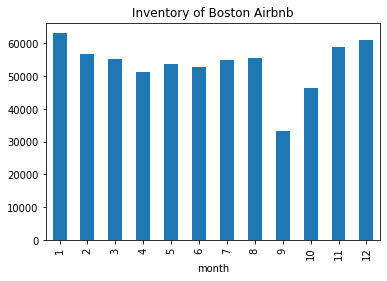

In [22]:
boston_inventory = boston_calendar_a['listing_id'].groupby(
    boston_calendar_a['date'].dt.month).count()
boston_inventory.plot(kind='bar')
plt.title('Inventory of Boston Airbnb')
plt.xlabel('month')

#### From the above result, we can see that Boston experiences a notable variation in its Airbnb inventory. The highest inventory occurs in December. Conversely, September witnesses the lowest inventory.

## Q4: How the airbnb price of Boston changes with the time?

### Monthly-averaged Price of Boston Airbnb

Text(0, 0.5, 'price ($)')

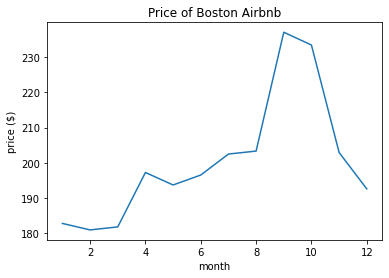

In [23]:
boston_price = boston_calendar_a['price'].groupby(
    boston_calendar_a['date'].dt.month).mean()
boston_price.plot()
plt.title('Price of Boston Airbnb')
plt.xlabel('month')
plt.ylabel('price ($)')

### Daily-averaged Price of Seattle Airbnb

In [24]:
boston_calendar_a.set_index('date', inplace=True)
boston_calendar_a_d= boston_calendar_a['price'].resample('D')

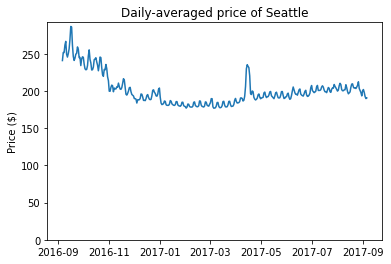

In [25]:
plt.plot(boston_calendar_a_d.mean())
plt.title('Daily-averaged price of Seattle')
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.ylabel('Price ($)')
plt.show()

#### In Boston, the highest average listing price is observed in September. February, on the other hand, stands out with the lowest average price, likely due to reduced tourist activity during the colder winter months. An interesting find is a peak at 2017-04. I searched online to see if there were any major events in Boston in April 2017. I found Boston Marathon was held at April 17, which may be the reason for the high demand.

## Q5: What is the difference of airbnb market between Seattle and Boston?

### Inventory comparsion between Seattle and Boston

Text(0.5, 0, 'month')

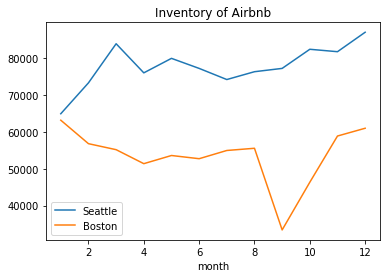

In [26]:
ax = seattle_inventory.plot()
boston_inventory.plot(ax=ax)
plt.legend(['Seattle', 'Boston'])
plt.title('Inventory of Airbnb')
plt.xlabel('month')

### Price comparsion between Seattle and Boston

Text(0, 0.5, 'price ($)')

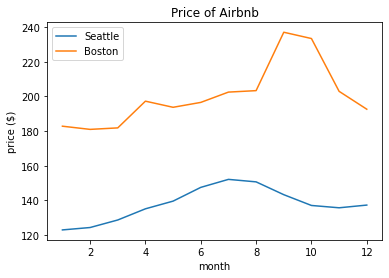

In [27]:
ax = seattle_price.plot()
boston_price.plot(ax=ax)
plt.legend(['Seattle', 'Boston'])
plt.title('Price of Airbnb')
plt.xlabel('month')
plt.ylabel('price ($)')

#### Throughout the year, Seattle consistently maintains a higher inventory than Boston. This suggests that there are more Airbnb listings available in Seattle, providing visitors with a wider range of options. Boston’s average listing price is substantially higher than that of Seattle throughout all months. This may due to the lower inventory of Airbnb in Boston.